# Безградиентные методы: часть 1

## Типизация методов оптимизации

- **Нулевого порядка**
- Первого порядка
- Второго порядка

## Методы нулевого порядка

- Нужно знать только значение функции в точках
- Применимы как к функциям, определённым на подмножестве $\mathbb{R}^n$, так и на дискретном множестве
- Переборные методы с некоторой эвристикой для переборе точек допустимого множества

### Метод Нелдера-Мида (John Nelder and Roger Mead (1965))

**Основная идея**: последовательное изменение симплекса 

на множестве определения функции в сторону области 

увеличения значений функции

**Вопрос**: что такое симплекс и сколько точек надо чтобы его задать?


### Псевдокод

```python
def NelderMeed(f, x0, maxiter, alpha=1., gamma=2., beta=0.5, delta=0.5):
    
    s = InitializeSimplex(x0)
    
    for i in range(maxiter):
        
        # sorted_s stored vertices of the simplex 
        
        # from the lowest value of f to the highest one
        
        sorted_s = OrderCurrentPoint(s, f)
        
        centroid = np.mean(sorted_s[1:])
        
        # Now we start transfomation of the current simplex
        
        # Reflection w.r.t. centroid from the worst point 
        
        x_r = centroid + alpha * (centroid - sorted_s[0])
        
        if f(sorted_s[1]) < f(x_r) and f(x_r) <= f(sorted_s[-1]):
            
            sorted_s[0], sorted_s[1] = sorted_s[1], x_r
            
            s = sorted_s
            
            continue
        
        elif f(x_r) > f(sorted_s[-1]):
            
            # Expansion
            
            x_e = centroid + gamma * (x_r - centroid)
            
            if f(x_e) > f(x_r):
                    
               sorted_s[0] = x_e
            
            else:
               
               sorted_s[0] = x_r
                  
            s = sorted_s
        
        elif f(sorted_s[1]) > f(x_r):
            
            # Contraction
            
            x_c = centroid + beta * (sorted_s[0] - centroid)
                            
            if f(x_c) > f(sorted_s[0]):
                
                sorted_s[0] = x_c
                
                continue
            
            else:
                
                # Shrink contraction
                                    
                sorted_s = ShrinkCurrentSimplex(sorted_s, delta)
                                    
            s = sorted_s
        
        x = np.mean(s)

    return x
```

### Особенности работы метода

- Изменения симплекса регулируются эвристическими параметрами
- Набор модификаций симплекса можно изменять
- Критерии остановки
    - Число итераций
    - Незначительность изменения симплекса
    - Малость пространства, которое покрывает симплекс
- Инициализация может существенно влиять на сходимость


### Визуализация работы метода Нелдера-Мида

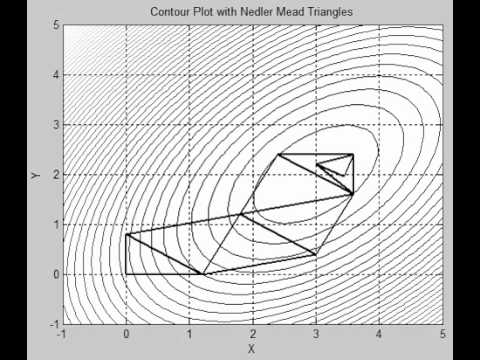

In [81]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('HUqLxHfxWqU')

### Пример работы метода 

In [89]:
import scipy.optimize as spopt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 20
x0 = np.random.randn(n)
x = spopt.fmin(spopt.rosen, x0, maxiter=10000)
print(x)
print(np.linalg.norm(spopt.rosen_der(x)))

[ 0.4673489   0.12735097 -0.29967968  0.25317929 -0.08645607  0.01012542
  0.0576095   0.0344856  -0.00723057 -0.08738018  0.09650493 -0.00108555
 -0.35807348  0.06055441 -0.8508088   1.00661193  0.94675395  0.85176552
  0.71326204  0.4733046 ]
163.05435781262125


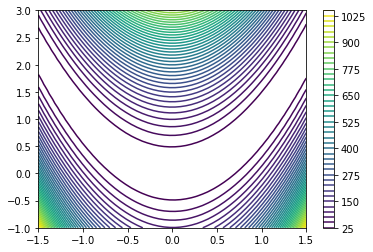

In [90]:
x = np.linspace(-1.5, 1.5)
y = np.linspace(-1, 3)
xx, yy = np.meshgrid(x, y)
m = xx.shape[0]
Z = np.zeros((m, m))
for i in range(m):
    for j in range(m):
        Z[i, j] = spopt.rosen(np.array([xx[i, j], yy[i, j]]))
plt.contour(xx, yy, Z, 50)
plt.colorbar()

### Mетод ветвей и границ (Branch & Bound method)

**Основная идея**: разбивать допустимое множество 

на непересекающиеся подмножества и искать верхние и нижние оценки 

для функции на этих множествах. 

После этого на основании сравнения оценок отсекать 

одно из множест из рассмотрения и 

продолжить дробить выбранное множество 

пока не будет найдено решение.

### Комментарии

- Используется для решения NP-сложных задач, задач дискретной и комбинаторной оптимизации
- Представление прпостранства решения в виде двоичного дерева. В каждом узле одна из переменных меняет значение.
- В худшем случае по-прежнему может потребоваться полный перебор всех вариантов
- Некоторые способы получения нижних оценок будут рассмотрены позднее в курсе
- Неоднозначность спопоба прохода по дереву
    - Поиск в глубину
    - Поиск в ширину
    - Гибридные стратегии

### Илюстрация метода доступна по ссылке ниже
https://ocw.mit.edu/courses/sloan-school-of-management/15-053-optimization-methods-in-management-science-spring-2013/tutorials/MIT15_053S13_tut10.pdf

### Метод имитации отжига (Simulated annealing)

- Метод вдохновлён физическим процессом отжига, при котором атомы располагаются в кристаллической решётке так, чтобы суммарная энергия была минимальна
- Появляется параметр температуры, от которого зависит вероятность перехода в точку, в которой значение фугнкции больше текущего
- Необходима процедура выбора соседней точки

### Псевдокод

```python
def SimulatedAnnealing(f, Tmax, maxiter):
    
    x = GenerateInitialSolution()
    
    x_best = x
    
    for i in range(maxiter):
        
        x_n = GenerateNeighbour(x)
        
        T = ComputeTemp(i, Tmax)
        
        if f(x_n) < f(x):
            
            x = x_n
            
            if f(x_n) < f(x_best):
                
                x_best = x_n
                
        elif np.exp((f(x) - f(x_n)) / T) > np.random.rand():
            
            x = x_n
    
    return x_best
```

### Особенности работы

- Необходимо определить операции для
    - поиска соседней точки
    - изменения температуры
- Правильное начальное приближение может сущесмтвено ускорить сходимость
- Вероятностное принятие точки с большим значением функции приводит к отсутствию застревания в локальных минимумах
- Как организовать вероятностное принятие точки - тоже эвристика

## Резюме

- Метод Нелдера-Мида
- Метод ветвей и границ
- Метод имитации отжига